# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/investor-relations). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

Instructions

This section divides the instructions for this Challenge into four steps and an optional fifth step, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

* Step 5 (optional): Forecast revenue by using time series models

The following subsections detail these steps.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?

## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.


## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install pystan
!pip install prophet
!pip install hvplot
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

In [3]:
# Upload the "google_hourly_search_trends.csv" file into Colab, then store in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

from google.colab import files
uploaded = files.upload()

df_mercado_trends = pd.read_csv('google_hourly_search_trends.csv')# YOUR CODE HERE

# Review the first and last five rows of the DataFrame
# YOUR CODE HERE
display(df_mercado_trends.head(5))

Saving google_hourly_search_trends.csv to google_hourly_search_trends.csv


,Date,Search Trends
0,6/1/16 0:00,97
1,6/1/16 1:00,92
2,6/1/16 2:00,76
3,6/1/16 3:00,60
4,6/1/16 4:00,38


In [4]:
# Review the data types of the DataFrame using the info function
# YOUR CODE HER
df_mercado_trends.dtypes

Date             object
Search Trends     int64
dtype: object

In [5]:
def date_checker(x,month=5,year=20):
    m,d,y = x.split(" ")[0].split("/")
    return int(m)==month and int(y)==year

In [6]:
# df_mercado_trends['Date'] = pd.to_datetime(df_mercado_trends.Date)

In [7]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends[df_mercado_trends.Date.apply(date_checker,args=(5,20))]# YOUR CODE HERE

# Use hvPlot to visualize the data for May 2020
# YOUR CODE HERE
df_may_2020.hvplot(x='Date',rot=90,width=800)

Output hidden; open in https://colab.research.google.com to view.

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [8]:
_df_mercado_trends = df_mercado_trends.copy()

In [9]:
_df_mercado_trends.Date = pd.to_datetime(df_mercado_trends.Date)

In [10]:
_df_mercado_trends

,Date,Search Trends
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38
...,...,...
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97


In [11]:
avg_median_traffic = _df_mercado_trends.resample('M',on='Date').median()

In [12]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020['Search Trends'].sum()# YOUR CODE HERE

# View the traffic_may_2020 value
# YOUR CODE HERE
print(traffic_may_2020)

38181


In [13]:
_df_mercado_trends['year'] = _df_mercado_trends.Date.apply(lambda x:x.year)

In [14]:
_df_mercado_trends['month'] = _df_mercado_trends.Date.apply(lambda x:x.month)

In [15]:
# Calcluate the monhtly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = _df_mercado_trends.groupby(['year','month']).sum().median().iloc[0]# YOUR CODE HERE

# View the median_monthly_traffic value
# YOUR CODE HERE
print(median_monthly_traffic)

35172.5


In [16]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
# YOUR CODE HERE
print(f"May 2020 Traffic: {traffic_may_2020:,.1f} Vs. Median Monthly Traffic {median_monthly_traffic:,.0f}")

May 2020 Traffic: 38,181.0 Vs. Median Monthly Traffic 35,172


##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** # Yes, there were around 3k more searches than the median

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [17]:
# SETTING DATETIME INDEX
_df_mercado_trends.set_index('Date',inplace=True)

In [18]:
# Get weekday based on the date
_df_mercado_trends['weekday'] = [x.weekday() for x in _df_mercado_trends.index.tolist()]

In [19]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
# YOUR CODE HERE
_df_mercado_trends.groupby('weekday').mean()[['Search Trends']].hvplot(kind='bar')
# weekday starting monday as 0

Output hidden; open in https://colab.research.google.com to view.

#### Step 2: Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

In [20]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.
# YOUR CODE HERE
_df_mercado_trends[['Search Trends']].hvplot.heatmap(x='Date.hour', y='Date.dayofweek', C='Search Trends', 
                  height=500, width=800, colorbar=True)

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** # NO

#### Step 3: Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

In [21]:
from datetime import datetime

In [22]:
_df_mercado_trends['weekofYear'] = _df_mercado_trends.index.weekofyear

<ipython-input-22-9629f89a5094>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  _df_mercado_trends['weekofYear'] = _df_mercado_trends.index.weekofyear


In [23]:
_df_mercado_trends

,Search Trends,year,month,weekday,weekofYear
Date,,,,,
2016-06-01 00:00:00,97,2016,6,2,22
2016-06-01 01:00:00,92,2016,6,2,22
2016-06-01 02:00:00,76,2016,6,2,22
2016-06-01 03:00:00,60,2016,6,2,22
2016-06-01 04:00:00,38,2016,6,2,22
...,...,...,...,...,...
2020-09-07 20:00:00,71,2020,9,0,37
2020-09-07 21:00:00,83,2020,9,0,37
2020-09-07 22:00:00,96,2020,9,0,37


In [24]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
# YOUR CODE HERE
_df_mercado_trends.groupby('weekofYear').sum().hvplot(kind='bar',x='weekofYear',y='Search Trends',rot=90)

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

**Answer:** # Yes, There is a gradual increase but high traffic weeks are wk 22 -36

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [25]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
from google.colab import files
uploaded = files.upload()

df_mercado_stock = pd.read_csv('mercado_stock_price.csv')# YOUR CODE HERE

# View the first and last five rows of the DataFrame
# YOUR CODE HERE
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

Saving mercado_stock_price.csv to mercado_stock_price.csv


,date,close
0,2015-01-02 09:00:00,127.67
1,2015-01-02 10:00:00,125.44
2,2015-01-02 11:00:00,125.57
3,2015-01-02 12:00:00,125.40
4,2015-01-02 13:00:00,125.17


,date,close
48890,2020-07-31 11:00:00,1105.780
48891,2020-07-31 12:00:00,1087.925
48892,2020-07-31 13:00:00,1095.800
48893,2020-07-31 14:00:00,1110.650
48894,2020-07-31 15:00:00,1122.510


In [26]:
from bokeh.models.formatters import DatetimeTickFormatter
formatter = DatetimeTickFormatter(months='%b %Y')

In [27]:
df_mercado_stock.date = pd.to_datetime(df_mercado_stock.date)

In [28]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
# YOUR CODE HERE
df_mercado_stock.hvplot(x='date',y='close',xformatter=formatter)

Output hidden; open in https://colab.research.google.com to view.

In [29]:
pd.to_datetime(df_mercado_trends.Date)

0       2016-06-01 00:00:00
1       2016-06-01 01:00:00
2       2016-06-01 02:00:00
3       2016-06-01 03:00:00
4       2016-06-01 04:00:00
                ...        
37101   2020-09-07 20:00:00
37102   2020-09-07 21:00:00
37103   2020-09-07 22:00:00
37104   2020-09-07 23:00:00
37105   2020-09-08 00:00:00
Name: Date, Length: 37106, dtype: datetime64[ns]

In [31]:
df_mercado_stock.rename(columns={'date':'Date','close':'Close'},inplace=True)

In [33]:
df_mercado_trends.Date = pd.to_datetime(df_mercado_trends.Date)
df_mercado_stock.Date = pd.to_datetime(df_mercado_stock.Date)

In [37]:
df_mercado_trends.set_index('Date',inplace=True)

In [38]:
df_mercado_stock.set_index('Date',inplace=True)

In [41]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_trends,df_mercado_stock],axis=1)# YOUR CODE HERE
mercado_stock_trends_df.dropna(inplace=True)
# View the first and last five rows of the DataFrame
# YOUR CODE HERE
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,Search Trends,Close
Date,,
2016-06-01 09:00:00,6.0,135.16
2016-06-01 10:00:00,12.0,136.63
2016-06-01 11:00:00,22.0,136.56
2016-06-01 12:00:00,33.0,136.42
2016-06-01 13:00:00,40.0,136.10


,Search Trends,Close
Date,,
2020-07-31 11:00:00,20.0,1105.780
2020-07-31 12:00:00,32.0,1087.925
2020-07-31 13:00:00,41.0,1095.800
2020-07-31 14:00:00,47.0,1110.650
2020-07-31 15:00:00,53.0,1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [43]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 =  mercado_stock_trends_df.loc['2020-01':'2020-06']# YOUR CODE HERE

# View the first and last five rows of first_half_2020 DataFrame
# YOUR CODE HERE
display(first_half_2020.head())
display(first_half_2020.tail())

,Search Trends,Close
Date,,
2020-01-02 09:00:00,9.0,601.085
2020-01-02 10:00:00,14.0,601.290
2020-01-02 11:00:00,25.0,615.410
2020-01-02 12:00:00,37.0,611.400
2020-01-02 13:00:00,50.0,611.830


,Search Trends,Close
Date,,
2020-06-30 11:00:00,17.0,976.17
2020-06-30 12:00:00,27.0,977.50
2020-06-30 13:00:00,37.0,973.23
2020-06-30 14:00:00,45.0,976.50
2020-06-30 15:00:00,51.0,984.93


In [45]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`
# YOUR CODE HERE
first_half_2020.hvplot(shared_axes=False, subplots=True).cols(1)

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** # Yes, the price movement (volatility) correlate directly with the trends activity.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [61]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df["Search Trends"].shift(1)

In [62]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df.Close.rolling(window=4).std()


In [63]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the stock volatility
# YOUR CODE HERE
mercado_stock_trends_df['Stock Volatility'].hvplot()

Output hidden; open in https://colab.research.google.com to view.

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [64]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df.Close.pct_change()# YOUR CODE HERE


In [65]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
# YOUR CODE HERE
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,Search Trends,Close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Date,,,,,
2016-06-01 09:00:00,6.0,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,NaN,0.010876
2016-06-01 11:00:00,22.0,136.56,12.0,NaN,-0.000512
2016-06-01 12:00:00,33.0,136.42,22.0,0.693848,-0.001025
2016-06-01 13:00:00,40.0,136.10,33.0,0.235142,-0.002346


,Search Trends,Close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Date,,,,,
2020-07-31 11:00:00,20.0,1105.780,11.0,7.495900,0.006380
2020-07-31 12:00:00,32.0,1087.925,20.0,12.188462,-0.016147
2020-07-31 13:00:00,41.0,1095.800,32.0,7.393646,0.007239
2020-07-31 14:00:00,47.0,1110.650,41.0,10.169735,0.013552
2020-07-31 15:00:00,53.0,1122.510,47.0,15.408790,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [66]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
# YOUR CODE HERE
mercado_stock_trends_df.corr()

,Search Trends,Close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Search Trends,1.000000,0.012193,0.384292,-0.180861,-0.029899
Close,0.012193,1.000000,0.012135,0.477981,0.022796
Lagged Search Trends,0.384292,0.012135,1.000000,-0.118945,0.017929
Stock Volatility,-0.180861,0.477981,-0.118945,1.000000,0.046723
Hourly Stock Return,-0.029899,0.022796,0.017929,0.046723,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** # There appears to be not a strong correlation between lagged search traffice and stock vol. / stock price returns

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [69]:
df_mercado_trends

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38
...,...
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96


In [71]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()# YOUR CODE HERE

# Label the columns ds and y so that the syntax is recognized by Prophet
# YOUR CODE HERE
mercado_prophet_df.columns = ['ds','y']


# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df.dropna(inplace=True) # YOUR CODE HERE

# View the first and last five rows of the mercado_prophet_df DataFrame
# YOUR CODE HERE
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [72]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet() # YOUR CODE HERE

In [73]:
# Fit the time-series model.
# YOUR CODE HERE
model_mercado_trends.fit(mercado_prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphkj1xkl8/zbmm8s2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphkj1xkl8/5932hcmv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56707', 'data', 'file=/tmp/tmphkj1xkl8/zbmm8s2_.json', 'init=/tmp/tmphkj1xkl8/5932hcmv.json', 'output', 'file=/tmp/tmphkj1xkl8/prophet_modeldzhjtsvx/prophet_model-20230106050750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:07:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:08:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [74]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000,freq='H')# YOUR CODE HERE

# View the last five rows of the future_mercado_trends DataFrame
# YOUR CODE HERE
display(future_mercado_trends.tail())

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [75]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)# YOUR CODE HERE

# Display the first five rows of the forecast_mercado_trends DataFrame
# YOUR CODE HERE
display(forecast_mercado_trends.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.390875,80.608858,97.757466,44.390875,44.390875,45.227910,45.227910,45.227910,41.452579,...,1.860554,1.860554,1.860554,1.914777,1.914777,1.914777,0.0,0.0,0.0,89.618785
1,2016-06-01 01:00:00,44.391810,77.943459,94.275127,44.391810,44.391810,41.673716,41.673716,41.673716,37.943427,...,1.810460,1.810460,1.810460,1.919830,1.919830,1.919830,0.0,0.0,0.0,86.065527
2,2016-06-01 02:00:00,44.392746,67.510037,83.883251,44.392746,44.392746,31.350247,31.350247,31.350247,27.656523,...,1.768874,1.768874,1.768874,1.924851,1.924851,1.924851,0.0,0.0,0.0,75.742993
3,2016-06-01 03:00:00,44.393681,52.015965,69.549226,44.393681,44.393681,16.083050,16.083050,16.083050,12.417320,...,1.735889,1.735889,1.735889,1.929841,1.929841,1.929841,0.0,0.0,0.0,60.476731
4,2016-06-01 04:00:00,44.394617,34.656263,51.407833,44.394617,44.394617,-1.031813,-1.031813,-1.031813,-4.678072,...,1.711460,1.711460,1.711460,1.934799,1.934799,1.934799,0.0,0.0,0.0,43.362804


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

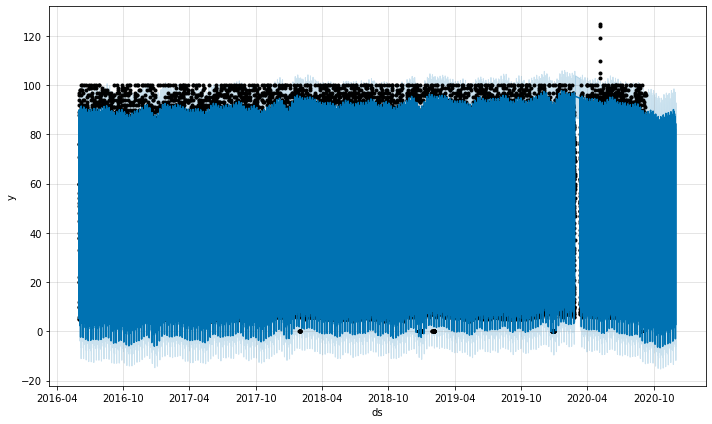

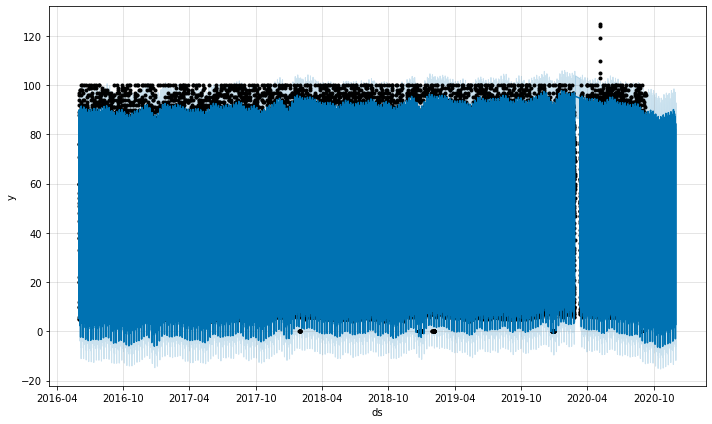

In [78]:
# Plot the Prophet predictions for the Mercado trends data
# YOUR CODE HERE
model_mercado_trends.plot(forecast_mercado_trends)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** # Appears to be downtrending


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [80]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds',inplace=True)

In [81]:

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
# YOUR CODE HERE
display(forecast_mercado_trends[['yhat','yhat_lower','yhat_upper']].head())

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.618785,80.608858,97.757466
2016-06-01 01:00:00,86.065527,77.943459,94.275127
2016-06-01 02:00:00,75.742993,67.510037,83.883251
2016-06-01 03:00:00,60.476731,52.015965,69.549226
2016-06-01 04:00:00,43.362804,34.656263,51.407833


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [82]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
# YOUR CODE HERE
forecast_mercado_trends[['yhat','yhat_lower','yhat_upper']].iloc[-2000:].hvplot()

Output hidden; open in https://colab.research.google.com to view.

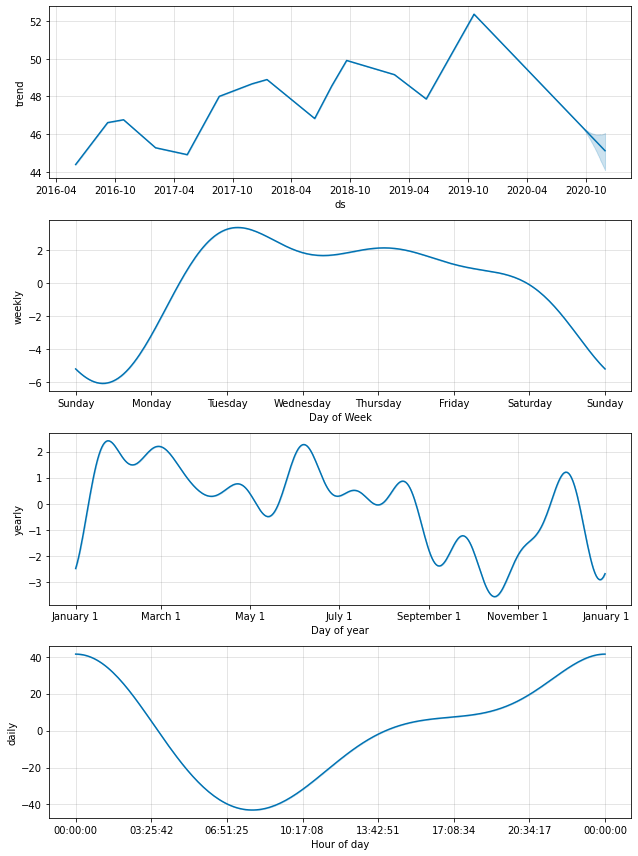

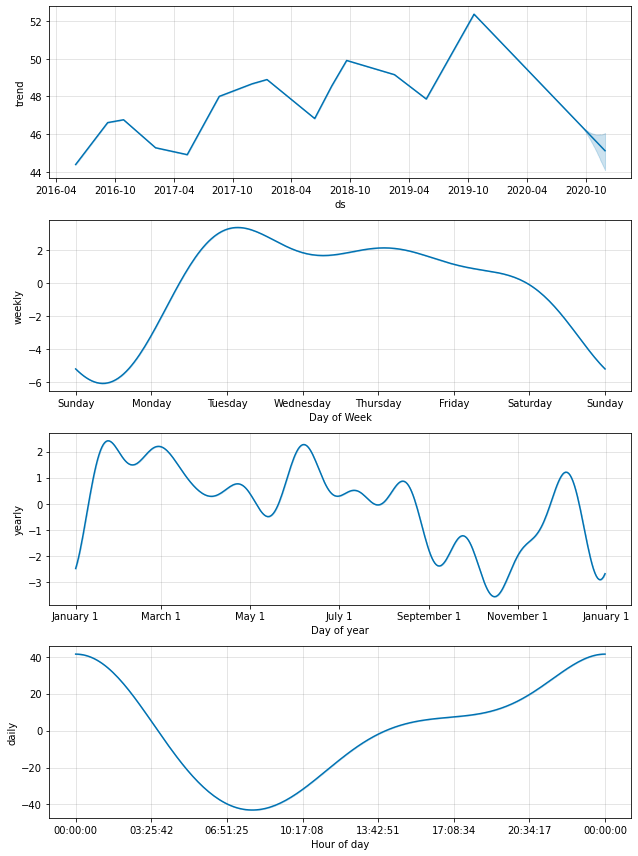

In [83]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()# YOUR CODE HERE

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
# figures_mercado_trends = # YOUR CODE HERE
model_mercado_trends.plot_components(forecast_mercado_trends)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** # Midnight

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** # Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** # Around Mid-October


## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data. The daily sales figures are quoted in millions of USD dollars.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.




#### Step 1: Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

In [ ]:
# Upload the "mercado_daily_revenue.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the DatetimeIndex
# Sales are quoted in millions of US dollars
from google.colab import files
uploaded = files.upload()

df_mercado_sales = # YOUR CODE HERE

# Review the DataFrame
# YOUR CODE HERE


In [ ]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the daily sales figures 
# YOUR CODE HERE


In [ ]:
# Apply a Facebook Prophet model to the data.

# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = # YOUR CODE HERE

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df.columns = # YOUR CODE HERE

# Visualize the DataFrame
# YOUR CODE HERE


In [ ]:
# Create the model
mercado_sales_prophet_model = # YOUR CODE HERE

# Fit the model
# YOUR CODE HERE


In [ ]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = # YOUR CODE HERE

# Display the last five rows of the future DataFrame
# YOUR CODE HERE


In [ ]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = # YOUR CODE HERE

# Display the first 5 rows of the resulting DataFrame
# YOUR CODE HERE


#### Step 2: Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

In [ ]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue
# YOUR CODE HERE


##### Answer the following question:

**Question:** For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

**Answer:** # YOUR ANSWER HERE

#### Step 3: Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.

In [ ]:
# Plot the predictions for the Mercado sales
# YOUR CODE HERE


In [ ]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = # YOUR CODE HERE

# Display the first and last five rows of the DataFrame
# YOUR CODE HERE


In [ ]:
# Produce a sales forecast for the finance division
# giving them a number for expected total sales next quarter.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.

# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_quarter = # YOUR CODE HERE

# Update the column names for the forecast_quarter DataFrame
# to match what the finance division is looking for 
mercado_sales_forecast_quarter = # YOUR CODE HERE

# Review the last five rows of the DataFrame
# YOUR CODE HERE


In [ ]:
# Displayed the summed values for all the rows in the forecast_quarter DataFrame
# YOUR CODE HERE


### Based on the forecast information generated above, produce a sales forecast for the finance division, giving them a number for expected total sales next quarter. Include best and worst case scenarios, to better help the finance team plan.

**Answer:** # YOUR ANSWER HERE